## Transaction Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the transaction data
transaction_file_path = r'C:\Users\Student\YUU-learnToCode\DataAnalytics\Capstone2\Capstone2\transaction_data.csv' 
transaction_data = pd.read_csv(transaction_file_path, delimiter = ',')



this code block will generatr the first 5 rows in the data. the data is split indicated by the \ to fit in the space.


In [3]:
# first few rows of the transaction data
print('Preview of Transaction Data:')
print(transaction_data.head())


Preview of Transaction Data:
   TransactionID  CustID       Date       Employee  ProductID  \
0          10258       1  7/17/2023  Nancy Davolio         32   
1          10275       2   8/7/2023  Nancy Davolio         24   
2          10275       2   8/7/2023  Nancy Davolio         59   
3          10292       3  8/28/2023  Nancy Davolio         20   
4          10293       4  8/29/2023  Nancy Davolio         18   

              ProductName  VendorID              ProductVendor  UnitPrice  \
0      Mascarpone Fabioli        14    Formaggi Fortini s.r.l.       25.6   
1        Guaran Fantstica        10  Refrescos Americanas LTDA        3.6   
2    Raclette Courdavault        28                Gai pturage       44.0   
3  Sir Rodney's Marmalade         8   Specialty Biscuits, Ltd.       64.8   
4        Carnarvon Tigers         7              Pavlova, Ltd.       50.0   

   Quantity  Subtotal  Tax(8%)  OrderTotal  
0         6     153.6    12.29      165.89  
1        12      43.2     3

this block will generate the imfo of the data that will gove us column names, data types of the collumn and there are any null values

In [4]:
print('\nTransaction Data Info:')
print(transaction_data.info())


Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  1353 non-null   int64  
 1   CustID         1353 non-null   int64  
 2   Date           1353 non-null   object 
 3   Employee       1353 non-null   object 
 4   ProductID      1353 non-null   int64  
 5   ProductName    1353 non-null   object 
 6   VendorID       1353 non-null   int64  
 7   ProductVendor  1353 non-null   object 
 8   UnitPrice      1353 non-null   float64
 9   Quantity       1353 non-null   int64  
 10  Subtotal       1353 non-null   float64
 11  Tax(8%)        1353 non-null   float64
 12  OrderTotal     1353 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 137.5+ KB
None


this block will give us a statistical analysis of the columns which can be useful for the prices and quantites

In [5]:
# summary of numerical columns
print('Numerical Data Summary:')
print(transaction_data.describe())



Numerical Data Summary:
       TransactionID       CustID    ProductID     VendorID    UnitPrice  \
count    1353.000000  1353.000000  1353.000000  1353.000000  1353.000000   
mean    10661.179601    38.942350    40.389505    14.318551    25.908899   
std       243.094311    25.056615    22.277628     8.217175    28.613063   
min     10248.000000     1.000000     1.000000     1.000000     2.000000   
25%     10454.000000    17.000000    21.000000     7.000000    12.000000   
50%     10656.000000    35.000000    41.000000    14.000000    18.400000   
75%     10864.000000    60.000000    60.000000    21.000000    31.230000   
max     11077.000000    89.000000    77.000000    29.000000   263.500000   

          Quantity     Subtotal      Tax(8%)   OrderTotal  
count  1353.000000  1353.000000  1353.000000  1353.000000  
mean     12.631929   324.537568    25.962971   350.500540  
std       6.395421   403.982507    32.318600   436.301107  
min       1.000000     4.800000     0.380000     5.

this block will generate the amount of transactions grouped by category

In [6]:
#values and counts for categorical columns
print('\nUnique Values in Categorical Columns:')
for i in transaction_data.select_dtypes(include=['object', 'category']).columns:
    print(f"\nColumn: {i}")
    print(transaction_data[i].value_counts().head())



Unique Values in Categorical Columns:

Column: Date
Date
5/6/2025     31
2/26/2025    12
4/3/2025      8
5/5/2025      8
3/26/2025     8
Name: count, dtype: int64

Column: Employee
Employee
Margaret Peacock    265
Nancy Davolio       221
Janet Leverling     196
Laura Callahan      172
Andrew Fuller       145
Name: count, dtype: int64

Column: ProductName
ProductName
Guaran Fantstica                   34
Jack's New England Clam Chowder    34
Tarte au sucre                     31
Gnocchi di nonna Alice             30
Konbu                              30
Name: count, dtype: int64

Column: ProductVendor
ProductVendor
Plutzer Lebensmittelgromrkte AG    116
Pavlova, Ltd.                       93
Specialty Biscuits, Ltd.            82
G'day, Mate                         70
Formaggi Fortini s.r.l.             63
Name: count, dtype: int64


this block will generate the total revenue of all transactions

In [7]:
#Calculate total revenue 
total_revenue = transaction_data['OrderTotal'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Revenue: $474,227.23


In [8]:
#Transactions by Product
sales_by_product = transaction_data.groupby('ProductName')['OrderTotal'].sum()
print('\nTotal Sales by Product:')
print(sales_by_product.sort_values(ascending=False).head())  # Top products by revenue



Total Sales by Product:
ProductName
Thringer Rostbratwurst    39943.16
Cte de Blaye              33865.02
Tarte au sucre            18876.56
Manjimup Dried Apples     17618.48
Gnocchi di nonna Alice    17400.96
Name: OrderTotal, dtype: float64


this blok generates the average transaction amount

In [9]:
# Average Transaction total
average_transaction = transaction_data['OrderTotal'].mean()
print(f"\nAverage Transaction Total: ${average_transaction:,.2f}")



Average Transaction Total: $350.50


this block will generate the amount of transactions by employee.
we can see that margaret sold the most whilw anne sold the least

In [10]:
# Count of Transactions by Employee
transaction_counts = transaction_data['Employee'].value_counts()
print('\nTransaction Counts by Employee:')
print(transaction_counts)



Transaction Counts by Employee:
Employee
Margaret Peacock    265
Nancy Davolio       221
Janet Leverling     196
Laura Callahan      172
Andrew Fuller       145
Michael Suyama      118
Robert King         101
Steven Buchanan      73
Anne Dodsworth       62
Name: count, dtype: int64


this block will generate a bar chart to show us the top 10 products that our company has sold
this isuseful because we can see what products are doing the best

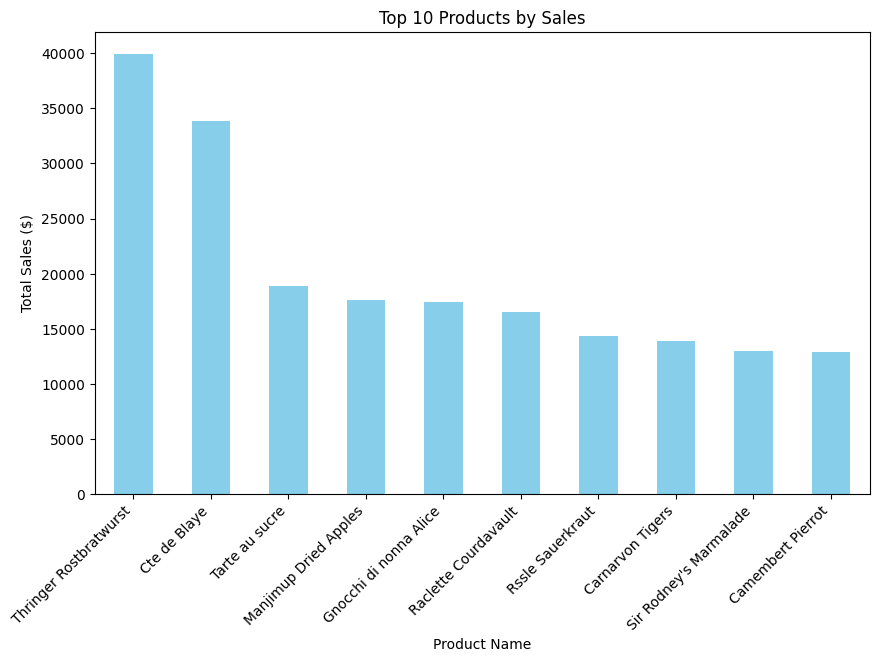

In [11]:
# Plot a bar chart with plt.subplots()
sales_by_product = transaction_data.groupby('ProductName')['OrderTotal'].sum()
top_products = sales_by_product.sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Top 10 Products by Sales')
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


this block is similar to the last but will generate the bottom 10 products sold.
this is useful because we can decide if it is not worth keeping some products or maybe we can find a way to sell more of them 
such as maybe more advertising or offer deals

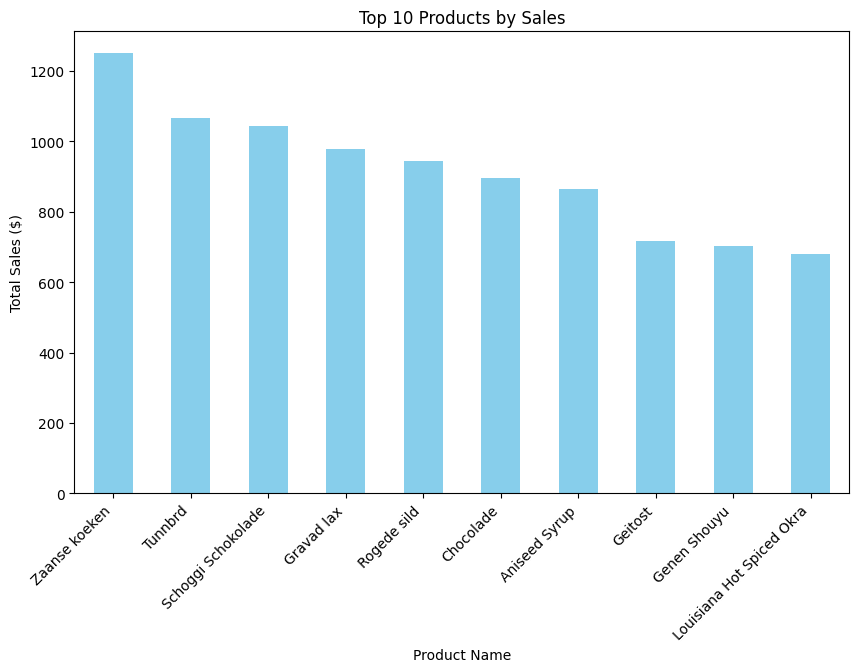

In [12]:
sales_by_product = transaction_data.groupby('ProductName')['OrderTotal'].sum()
top_products = sales_by_product.sort_values(ascending=False).tail(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Top 10 Products by Sales')
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


this block will genertae the total reveue by month 
it also ensures the dates are in proper format

In [13]:
transaction_data['Date'] = pd.to_datetime(transaction_data['Date'])
print('Date column converted to datetime format.')
transaction_data.set_index('Date', inplace=True)
    
# Group by year and month, then calculate total sales
monthly_sales = transaction_data['OrderTotal'].resample('ME').sum()
print('Monthly Sales Summary:')
print(monthly_sales.head())

Date column converted to datetime format.
Monthly Sales Summary:
Date
2023-07-31     8929.43
2023-08-31    17330.78
2023-09-30    10119.39
2023-10-31    14613.79
2023-11-30    15535.69
Freq: ME, Name: OrderTotal, dtype: float64


this block will generate a plot to visualize the total revenue by month over time
unfortunately wesold less in may 2025 but that could be due to maybe not having data for the whole moth

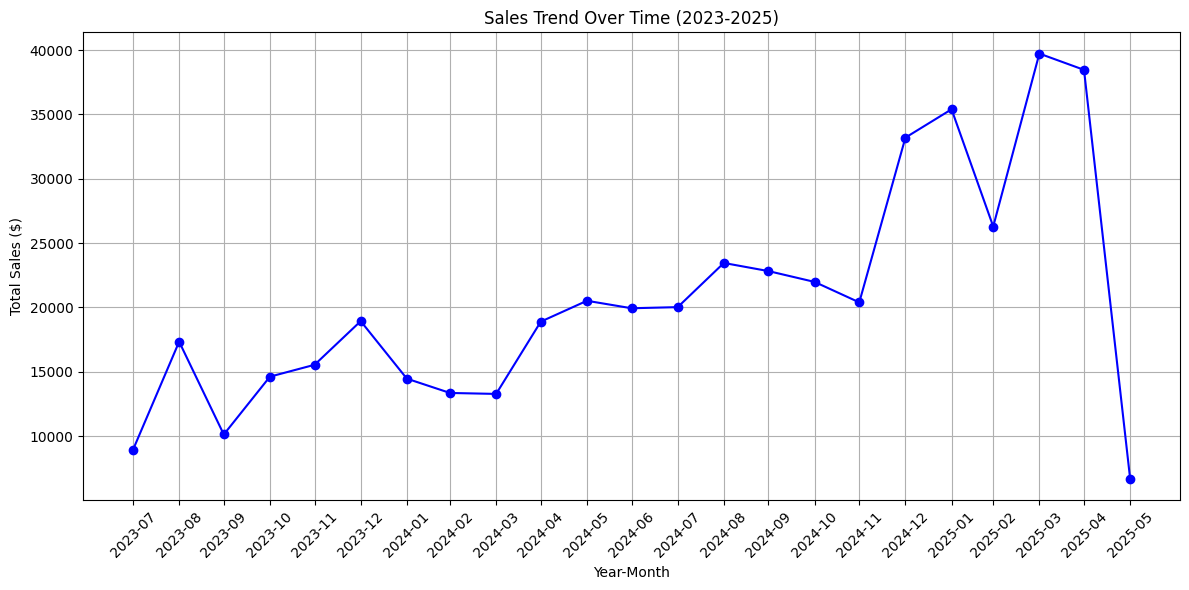

In [14]:
# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.title('Sales Trend Over Time (2023-2025)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(ticks=monthly_sales.index, labels=monthly_sales.index.strftime('%Y-%m'), rotation=45)
plt.tight_layout()
plt.show()